In [2]:
!pip install pyaudio
### Audio Classification using Machine Learing
import pyaudio
import wave

def record_audio(file_name, duration=6, channels=1, sample_rate=44100, chunk_size=1024, format=pyaudio.paInt16):
    # Initialize PyAudio
    audio = pyaudio.PyAudio()

    # Open stream
    stream = audio.open(format=format,
                        channels=channels,
                        rate=sample_rate,
                        input=True,
                        frames_per_buffer=chunk_size)

    print("Recording...")

    frames = []

    # Record audio
    for i in range(0, int(sample_rate / chunk_size * duration)):
        data = stream.read(chunk_size)
        frames.append(data)

    print("Finished recording.")

    # Stop and close the stream
    stream.stop_stream()
    stream.close()

    # Terminate PyAudio
    audio.terminate()

    # Save the recorded audio as a WAV file
    with wave.open(file_name, 'wb') as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(audio.get_sample_size(format))
        wf.setframerate(sample_rate)
        wf.writeframes(b''.join(frames))

if __name__ == "__main__":
    file_name = "recorded_audio.wav"
    record_audio(file_name)
    print(f"Audio recorded and saved as {file_name}")

Recording...
Finished recording.
Audio recorded and saved as recorded_audio.wav


In [1]:
!pip install librosa


Defaulting to user installation because normal site-packages is not writeable


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
filename='dog-bark1.wav'

In [7]:
#Dog sound 
!pip install librosa
import IPython.display as ipd
# from IPython.display import HTML
# HTML("<h1>Hello, world!</h1>")

plt.figure(figsize=(14,5)) 
import librosa
import librosa.display # type: ignore


Defaulting to user installation because normal site-packages is not writeable


<Figure size 1400x500 with 0 Axes>

In [ ]:
filename='dog-bark1.wav'
librosa_data,librosa_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_data,sr=librosa_sample_rate)
ipd.Audio(filename) # shows the file directly of audio 

In [ ]:
filename='UrbanSound8K/audio/fold1/9031-3-2-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_data,sr=librosa_sample_rate)
ipd.Audio(filename)

In [16]:
librosa_sample_rate


22050

In [18]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [20]:
import soundfile as sf

# Read the WAV file using soundfile
sf_wave_audio_data, sf_wave_sample_rate = sf.read(filename)

In [22]:
sf_wave_sample_rate


44100

In [24]:
sf_wave_audio_data


array([0.07455444, 0.07434082, 0.07345581, ..., 0.07290649, 0.07373047,
       0.07318115])

In [26]:
librosa_data # from librosa 
# Have range different from -1 to 1

array([-1.0687611e-14,  1.9862175e-13,  4.1020312e-13, ...,
        1.2874905e-05,  2.4051074e-06,  0.0000000e+00], dtype=float32)

In [28]:
librosa_audio_data=librosa_data
import numpy as np
# Normalize the audio data to the range [-1, 1]
normalized_audio = librosa_audio_data / np.max(np.abs(librosa_audio_data))

In [30]:
normalized_audio

array([-6.9998655e-15,  1.3008759e-13,  2.6866310e-13, ...,
        8.4324365e-06,  1.5752283e-06,  0.0000000e+00], dtype=float32)

In [32]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10) #to read first 10 enteries


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [34]:
metadata['class'].value_counts() # finds the c|ount of all the enteries in all dataset 

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

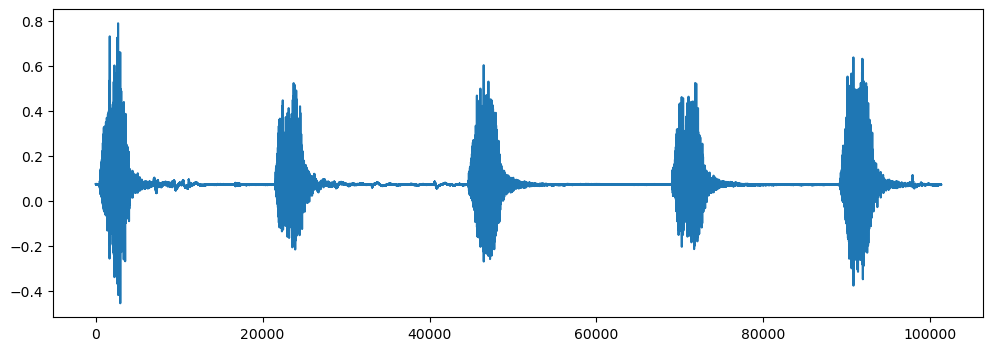

In [36]:
import matplotlib.pyplot as plt 

#orignal audio with 2 channel 
plt.figure(figsize=(12,4))
plt.plot(sf_wave_audio_data)



In [38]:
# for a single file
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 224)


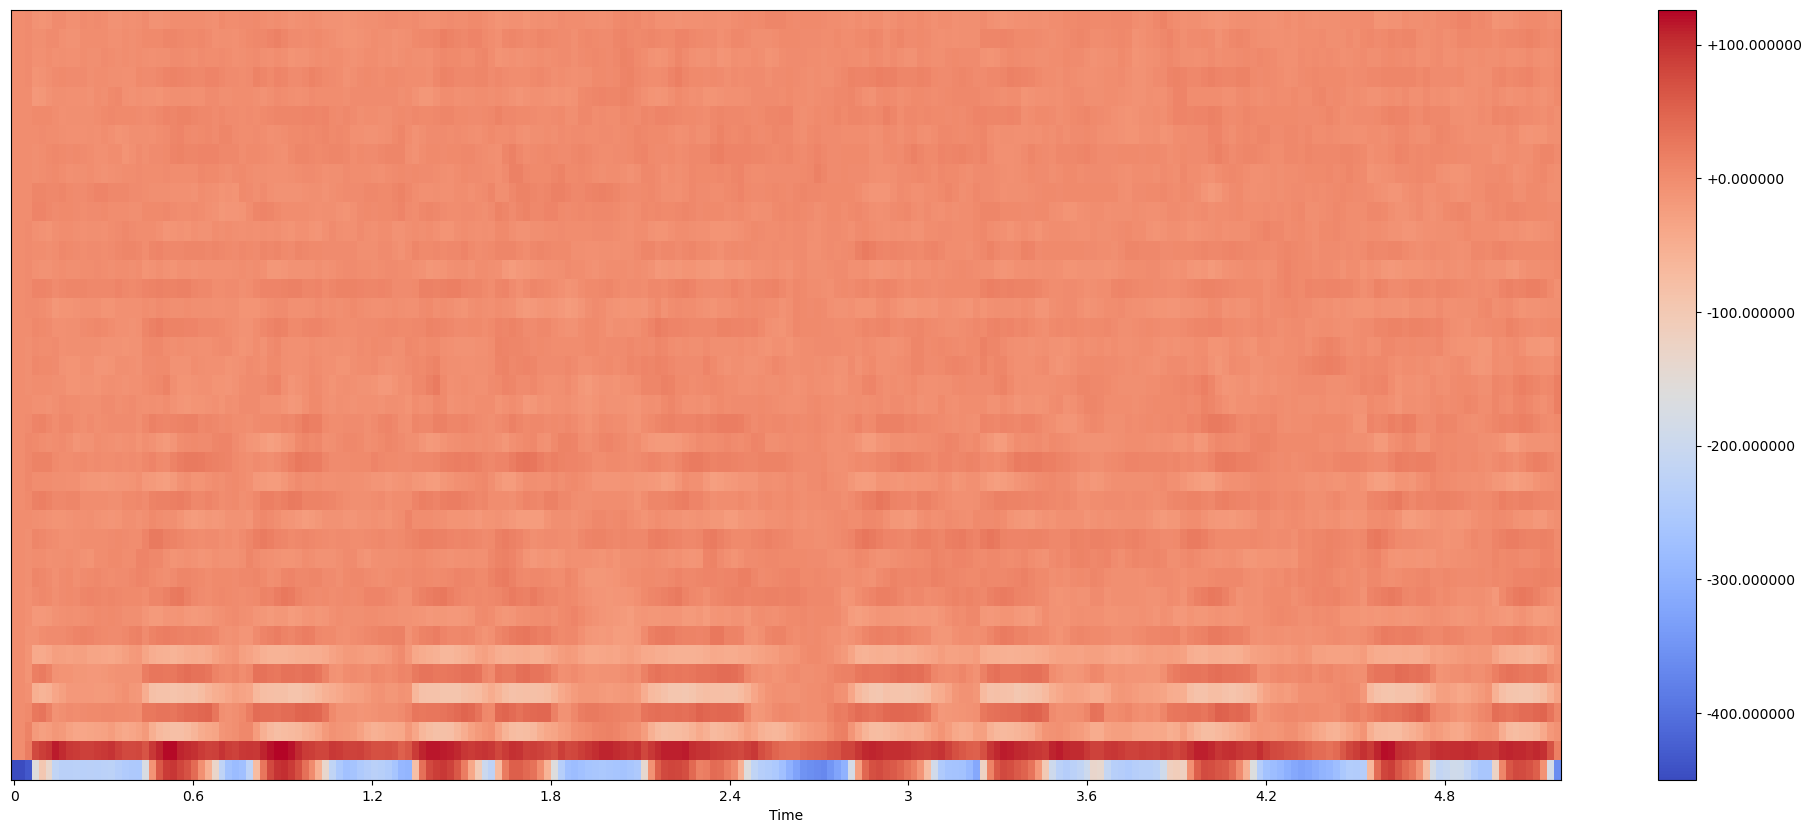

In [40]:
mfccs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,x_axis='time',sr=librosa_sample_rate)
plt.colorbar(format="%+2f")
plt.show()

In [42]:
# Extracting MFCC's for every audio file
import pandas as pd
import os 
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [44]:
def features_extractor(file_name):
   audio_data, sample_rate = librosa.load(file_name)
   mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
   mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
   return mfccs_scaled_features

In [46]:
%pip install resampy


   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
    --------------------------------------- 0.1/3.1 MB 525.1 kB/s eta 0:00:06
   - -------------------------------------- 0.2/3.1 MB 1.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.2/3.1 MB 1.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/3.1 MB 1.2 MB/s eta 0:00:03
   ----- ---------------------------------- 0.5/3.1 MB 1.5 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/3.1 MB 1.5 MB/s eta 0:00:02
   --------- ------------------------------ 0.7/3.1 MB 1.8 MB/s eta 0:00:02
   ----------- ---------------------------- 0.9/3.1 MB 2.0 MB/s eta 0:00:02
   ------------- -------------------------- 1.0/3.1 MB 2.0 MB/s eta 0:00:02
   -------------- ------------------------- 1.1/3.1 MB 2.0 MB/s eta 0:00:02
   --------------- -----------

In [209]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
##$ using Mel-frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#     print(file_name)
    final_class_labels=row['class']
#     print(final_class_labels)
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

import pickle

# Assuming mfcc_scaled_features is your variable containing the scaled MFCC features


455it [00:09, 45.83it/s]


KeyboardInterrupt: 

In [211]:
# to convert it into a Dataframe with two columns
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head(100)
with open('extracted_features.pkl', 'wb') as f:
    pickle.dump(extracted_features, f)

In [151]:
# seprating both the columns 
x=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [153]:
x.shape # mel frequency features 

(8732, 40)

In [155]:
x

array([[-2.11936981e+02,  6.25812073e+01, -1.22813148e+02, ...,
        -7.91083515e-01, -1.54006755e+00,  1.32114911e+00],
       [-4.17005188e+02,  9.93366241e+01, -4.29955864e+01, ...,
         1.70679843e+00, -1.79360640e+00,  1.76138461e+00],
       [-4.52393158e+02,  1.12362534e+02, -3.75780678e+01, ...,
         3.80801368e+00, -9.00557861e-02,  8.69102180e-01],
       ...,
       [-2.97315338e+02,  1.02090263e+02, -3.67510796e+01, ...,
        -1.62244558e+00,  1.25214386e+00,  9.13216686e+00],
       [-3.36923859e+02,  1.15313896e+02, -4.48470993e+01, ...,
        -6.76911306e+00, -2.85838675e+00,  6.95349169e+00],
       [-3.07417603e+02,  8.33067245e+01, -2.57565117e+01, ...,
         8.39591503e-01, -1.17747602e+01, -5.59599781e+00]], dtype=float32)

In [157]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [159]:
#label encoding 
# y=np.array(pd.get_dummies(y))
### label encoder
!pip install tensorflow
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
# doing for a reason
y=to_categorical(labelencoder.fit_transform(y)) # to encode all the classes firstly standerize and then fiting it in a range 

In [160]:
y.shape

(8732, 10)

In [163]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # Here it is done to split the dataset into two parts Here 
# 20 % of the whole dataset would be used for testing purpose and rest is for training purpose  therefore X_train is now 6985 not 8732

In [165]:
X_train.shape # here 40 is the number of extracted features

(6985, 40)

In [167]:
X_test.shape

(1747, 40)

In [169]:
y_train.shape

(6985, 10)

In [171]:
y_test.shape

(1747, 10)

In [173]:
X_train

array([[-1.24484680e+02,  1.03169846e+02, -1.33165474e+01, ...,
         4.72908735e+00, -2.91925478e+00,  4.36318684e+00],
       [-5.13921928e+00,  7.90478210e+01,  4.16248989e+00, ...,
        -3.44017529e+00, -5.19278336e+00, -1.54999781e+00],
       [-4.03939552e+01, -1.31092958e+01, -7.20987606e+00, ...,
         1.99475384e+00, -8.70601594e-01,  2.89561915e+00],
       ...,
       [-4.26655701e+02,  9.15513382e+01,  4.19170380e+00, ...,
         9.74400103e-01,  5.15445411e-01,  9.15374815e-01],
       [-1.37251968e+02,  1.24268539e+02, -2.15997734e+01, ...,
         1.25008631e+00, -1.89575124e+00, -9.01497185e-01],
       [-4.18389374e+02,  2.06862335e+02,  7.23461866e+00, ...,
        -3.98612142e+00, -4.71784496e+00, -2.78925896e-01]], dtype=float32)

In [43]:
# Model Creation using Tensor Flow
%pip install tensorflow

In [175]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [177]:
from tensorflow.keras.models import Sequential
# below is used to create ANN
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam

from sklearn import metrics

In [179]:
# print(y.shape)
num_labels=y.shape[1] # since classes are 10 in number
print(num_labels)
# Dense()

10


In [181]:
model=Sequential()
## First layer
model.add(Dense(100,input_shape=(40,))) # Here since 40 features therfore we did 40
model.add(Activation('relu')) # activation function 
model.add(Dropout(0.2)) # why dropout is used 
#Dropout is used with a rate of 0.2, meaning that during training, 20% of the units in the layer will be randomly dropped out,
#which helps prevent overfitting by reducing interdependent learning among neurons.

#second layer
model.add(Dense(200)) 
model.add(Activation('relu')) # activation function  Here relu is used  # for applying the non -linearity 
model.add(Dropout(0.2)) # why dropout is used

#third layer
model.add(Dense(100))  # Dense layer of full interconnected 100 units 
model.add(Activation('relu')) # activation function
model.add(Dropout(0.2)) 

#final layer
model.add(Dense(num_labels)) 
# softmax since multiclass classification
model.add(Activation('softmax')) # soft max activation function used for formation of output probabilities and


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [183]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
#for compiling  the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [187]:
# training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime # to calculate time

num_epochs=100
num_batch_size=12
checkpointer=ModelCheckpoint(filepath='saved_models/audio_classification.keras', verbose=1, save_best_only=True)

start=datetime.now()

# Print shapes of training and testing data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Fit the model
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer])

# Measure training duration
duration = datetime.now() - start
print("Training completed in time:", duration)



X_train shape: (6985, 40)
y_train shape: (6985, 10)
X_test shape: (1747, 40)
y_test shape: (1747, 10)
Epoch 1/100
544/583 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1396 - loss: 6.4415
Epoch 1: val_loss improved from inf to 2.18816, saving model to saved_models/audio_classification.keras
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1399 - loss: 6.2390 - val_accuracy: 0.1620 - val_loss: 2.1882
Epoch 2/100
555/583 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1919 - loss: 2.2219
Epoch 2: val_loss improved from 2.18816 to 1.82975, saving model to saved_models/audio_classification.keras
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1931 - loss: 2.2184 - val_accuracy: 0.3320 - val_loss: 1.8298
Epoch 3/100
572/583 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2997 - loss: 1.8962
Epoch 3: val_loss improved from 1.82975 to 1.55985, saving model to saved_models/audio_classification.keras
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3002 - loss: 1.8951 - val_ac

In [189]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy)


[0.37720656394958496, 0.8952490091323853]


In [191]:
filename="9223-2-0-10.wav"
prediction_feature=features_extractor(filename)
print(prediction_feature)
prediction_feature=prediction_feature.reshape(1,-1)
predictions=model.predict(prediction_feature)

[-2.56894684e+02  1.13383400e+02 -4.88289452e+01  2.50609818e+01
 -2.57628899e+01  1.54200613e+00 -7.10614204e+00 -1.81738347e-01
 -1.47560425e-02 -7.82581758e+00 -2.37405705e+00 -1.72822118e+00
  1.71940759e-01 -1.68439019e+00 -3.64913177e+00 -4.18054819e+00
 -9.37811470e+00  4.13374329e+00  1.45985734e+00 -4.83061522e-01
 -9.82409763e+00 -2.10626602e+00 -1.14755929e+00  8.88540804e-01
 -2.32707357e+00  3.00393514e-02 -2.34027958e+00  9.47026134e-01
 -9.86084223e-01  4.21894550e+00 -5.89243285e-02  2.22682309e+00
 -1.44474268e+00  4.89486027e+00  4.91630650e+00  5.02855730e+00
  1.70231068e+00  3.72608805e+00 -1.90717041e+00  2.17339486e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [193]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [195]:
ans=np.argmax(predictions)
print(predictions)
print(ans)

[[4.9768126e-04 1.1901873e-05 9.0722626e-01 2.8128926e-02 1.7410173e-03
  5.7925778e-03 4.0987100e-02 4.1820196e-05 2.1601305e-03 1.3412564e-02]]
2


In [203]:
# filename="dog-bark1.wav"
# audio, sample_rate = librosa.load(filename)
# mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
# mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
# print(mfccs_scaled_features)
# mfccs_scaled_features=mfccs_scaled_features.reshape(-1,1)
# mfccs_scaled_features = mfccs_scaled_features.squeeze()  # Remove the extra dimension
# print(mfccs_scaled_features.shape)  # Verify the shape is now (N,)

# predicted_label=model.predict(mfccs_scaled_features)
# print(predicted_label)

# prediction_class=labelencoder.inverse_transform(predicted_label)
# prediction_class

# import pyaudio
# import wave

# def record_audio(file_name, duration=10, channels=1, sample_rate=44100, chunk_size=1024, format=pyaudio.paInt16):
#     # Initialize PyAudio
#     audio = pyaudio.PyAudio()

#     # Open stream
#     stream = audio.open(format=format,
#                         channels=channels,
#                         rate=sample_rate,
                        
#                         input=True,
#                         frames_per_buffer=chunk_size)

#     print("Recording...")

#     frames = []

#     # Record audio
#     for i in range(0, int(sample_rate / chunk_size * duration)):
#         data = stream.read(chunk_size)
#         frames.append(data)

#     print("Finished recording.")

#     # Stop and close the stream
#     stream.stop_stream()
#     stream.close()

#     # Terminate PyAudio
#     audio.terminate()

#     # Save the recorded audio as a WAV file
#     with wave.open(file_name, 'wb') as wf:
#         wf.setnchannels(channels)
#         wf.setsampwidth(audio.get_sample_size(format))
#         wf.setframerate(sample_rate)
#         wf.writeframes(b''.join(frames))

# if __name__ == "__main__":
#     file_name = "recorded_audio.wav"
#     record_audio(file_name)
#     print(f"Audio recorded and saved as {file_name}")
    
    
filename = "7064-6-1-0.wav" # for gunshot 
# filename = "dog-bark1.wav" # for dog bark
# filename="9223-2-0-10.wav" # for children Playing 



audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
print("MFCCs Features Shape:", mfccs_scaled_features.shape)

# Reshape MFCC features and remove extra dimension
mfccs_scaled_features = mfccs_scaled_features.reshape(-1, 1)
mfccs_scaled_features = mfccs_scaled_features.squeeze()
print("Reshaped MFCCs Features Shape:", mfccs_scaled_features.shape)

# Make predictions using the trained model
predicted_label = model.predict(mfccs_scaled_features.reshape(1, -1))
print("Predicted Label (Probabilities):", predicted_label)


# Decode the predicted label using the label encoder
predicted_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))
print("Predicted Class:", predicted_class)
# ipd.Audio(filename) # shows the file directly of audio 


import pickle
with open('model_audio_classification.pkl', 'wb') as file:
    pickle.dump(model, file)
# predicted_class="Engine Idling"

from win32com.client import Dispatch

speak = Dispatch("SAPI.SpVoice").Speak
  
speak(f"It is a  {predicted_class}")


if(predicted_class == 'gun_shot'):
    speak(" gunshot Detected  !!! \n Calling the Police \n !!! Closing all the gates  \n Mark Your Position \n")

ipd.Audio(filename)


MFCCs Features Shape: (40,)
Reshaped MFCCs Features Shape: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label (Probabilities): [[1.2531088e-02 4.1798208e-04 5.7747019e-03 1.0363485e-02 4.2196922e-03
  5.5376799e-03 8.9350915e-01 3.1282976e-02 3.0337036e-02 6.0261870e-03]]
Predicted Class: ['gun_shot']


In [205]:
with open('model_audio_classification.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [207]:
predictions = loaded_model.predict(X_test)
print(predictions)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[8.9952355e-06 2.7942160e-06 3.3377412e-06 ... 6.3878791e-10
  5.5768751e-08 9.4764746e-06]
 [2.9399114e-20 1.5190315e-04 1.0288749e-09 ... 2.7173601e-17
  5.2216975e-10 3.0408903e-06]
 [1.1323504e-09 1.2934469e-08 7.3538563e-06 ... 2.5119977e-03
  3.6837525e-12 3.8320632e-05]
 ...
 [8.2576390e-10 9.9999881e-01 6.8337336e-09 ... 3.1734698e-16
  1.8163733e-09 4.1641960e-07]
 [3.8759462e-03 2.7926973e-04 6.4804238e-01 ... 2.8910610e-04
  3.7308672e-04 3.4338757e-01]
 [1.6126921e-04 1.0518594e-04 5.1373172e-01 ... 6.4235778e-08
  2.3913207e-03 1.9133529e-03]]
